This notebook was another attempt to download climate scenario data from the MACA V2 dataset, using code from the Earth Lab textbook. I was able to download something from the website, but the data only pertained to one location rather than the area of my study site. I tried to plot the data, but it came up as a blank plot.

In [ ]:
# Code Cell 1

# Import packages
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")

In [ ]:
# Code Cell 2

model_name = (
            #   'bcc-csm1-1',
            #   'bcc-csm1-1-m',
            #   'BNU-ESM',
            #   'CanESM2',
            #   'CCSM4',
            #   'CNRM-CM5',
            #   'CSIRO-Mk3-6-0',
            #   'GFDL-ESM2G',
              'GFDL-ESM2M',
            #   'HadGEM2-CC365',
            #   'HadGEM2-ES365',
            #   'inmcm4',
            #   'IPSL-CM5A-MR',
            #   'IPSL-CM5A-LR',
            #   'IPSL-CM5B-LR',
            #   'MIROC5',
            #   'MIROC-ESM',
            #   'MIROC-ESM-CHEM',
            #   'MRI-CGCM3',
            #   'NorESM1-M'
              )


In [ ]:
# Code Cell 3

# This is the base url required to download data from the thredds server.
dir_path = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/'

# These are the variable options for the met data
variable_name = (
                #  'tasmax',
                #  'tasmin',
                #  'rhsmax',
                #  'rhsmin',
                 'pr',
                #  'rsds',
                #  'uas',
                #  'vas',
                #  'huss'
                 )

# These are var options in long form
var_long_name = (
                #  'air_temperature',
                #  'air_temperature',
                #  'relative_humidity',
                #  'relative_humidity',
                 'precipitation',
                #  'surface_downwelling_shortwave_flux_in_air',
                #  'eastward_wind',
                #  'northward_wind',
                #  'specific_humidity'
                )
# Scenarios
scenario_type = ('historical', 'rcp45', 'rcp85')

# Year start and ends (historical vs projected)
year_start = ('1950', '2006', '2006')
year_end = ('2005', '2099', '2099')
run_num = [1] * 20
run_num[4] = 6  # setting CCSM4 with run 6
domain = 'CONUS'

In [10]:
print("Length of variable_name:", len(variable_name))
print("Length of model_name:", len(model_name))
print("Length of scenario_type:", len(scenario_type))


Length of variable_name: 1
Length of model_name: 1
Length of scenario_type: 3


In [12]:
# Code Cell 4

# Model options between 0-19
model = 0
# Options 0-8 will work for var. Var maps to the variable name below
var = 0
# Options range from 0-2
scenario = 2

try: 
    print("Great! You have selected: \n \u2705 Variable: {} \n \u2705 Model: {}, "
      "\n \u2705 Scenario: {}".format(variable_name[var], 
                                      model_name[model],
                                      scenario_type[scenario]))
except IndexError as e:
    raise IndexError("Oops, it looks like you selected value that is "
                     "not within the range of values which is 0-2. please look"
                     "closely at your selected values.")

Great! You have selected: 
 ✅ Variable: pr 
 ✅ Model: GFDL-ESM2M, 
 ✅ Scenario: rcp85


In [13]:
try:
    time = year_start[scenario]+'_' + year_end[scenario]
    print("\u2705 Your selected time period is:", time)
except IndexError as e:
    raise IndexError("Oops, it looks like you selected a scenario value that is \
                     not within the range of values which is 0-2")
    

✅ Your selected time period is: 2006_2099


In [14]:
# This code creates a path to the monthly MACA v2 data
file_name = ('agg_macav2metdata_' +
             str(variable_name[var]) +
             '_' +
             str(model_name[model]) +
             '_r' +
             str(run_num[model])+'i1p1_' +
             str(scenario_type[scenario]) +
             '_' +
             time + '_' +
             domain + '_monthly.nc')

print("\u2705 You are accessing:\n", file_name, "\n data in netcdf format")

✅ You are accessing:
 agg_macav2metdata_pr_GFDL-ESM2M_r1i1p1_rcp85_2006_2099_CONUS_monthly.nc 
 data in netcdf format


In [15]:
full_file_path = dir_path + file_name
print("The full path to your data is: \n", full_file_path)

The full path to your data is: 
 http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_pr_GFDL-ESM2M_r1i1p1_rcp85_2006_2099_CONUS_monthly.nc


In [33]:
# Open the data from the thredds server
try:
    precip_xr = xr.open_dataset(full_file_path)
except OSError as oe:
    print("Oops, it looks like the file that you are trying to connect to, "
          "{}, doesn't exist. Try to revisit your model options to ensure "
          "the data exist on the server.  ".format(full_file_path))

In [34]:
# View your temperature data
precip_xr

<xarray.Dataset> Size: 4GB
Dimensions:        (lat: 585, crs: 1, lon: 1386, time: 1128)
Coordinates:
  * lat            (lat) float64 5kB 25.06 25.1 25.15 25.19 ... 49.31 49.35 49.4
  * crs            (crs) int32 4B 1
  * lon            (lon) float64 11kB 235.2 235.3 235.3 ... 292.9 292.9 292.9
  * time           (time) object 9kB 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
Data variables:
    precipitation  (time, lat, lon) float32 4GB ...
Attributes: (12/46)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    contributor_role:                Postdoctoral Fellow
    publisher_name:                  REACCH
    publisher_email:                 reacch@uidaho.edu
    publisher_url:                   http://www.reacchpna.org/
    license:                         Creative Commons CC0 1.0 Universal Dedic...
    coordinate_system:               WGS84,EPSG:4326

In [23]:
%store -r shey_gdf

In [25]:
shey_gdf.bounds

,minx,miny,maxx,maxy
3,-97.468801,46.095335,-96.938539,46.572034


In [35]:
# Select the latitude, longitude, and timeframe to subset the data to

# Ensure your latitude value is between 25 and 50, and your longitude value is between 235 and 292
latitude = 46
longitude = -97
start_date = '2008-01'
end_date = '2012-09'

In [36]:
# Select a lat / lon location that you wish to use to extract the data
latitude = precip_xr.lat.values[46]
longitude = precip_xr.lon.values[-97]
print("You selected the following x,y location:", longitude, latitude)

You selected the following x,y location: 288.935302734375 26.97971534729004


In [37]:
# Slice one lat/lon data point
pr_single_point = precip_xr["precipitation"].sel(
    lat=latitude,
    lon=longitude)

pr_single_point

<xarray.DataArray 'precipitation' (time: 1128)> Size: 5kB
[1128 values with dtype=float32]
Coordinates:
    lat      float64 8B 26.98
    lon      float64 8B 288.9
  * time     (time) object 9kB 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
Attributes:
    long_name:      Monthly Precipitation Amount
    units:          mm
    grid_mapping:   crs
    standard_name:  precipitation
    cell_methods:   time: sum(interval: 24 hours): sum over days
    comments:       Total monthly precipitation at surface: includes both liq...
    _ChunkSizes:    [ 10  44 107]

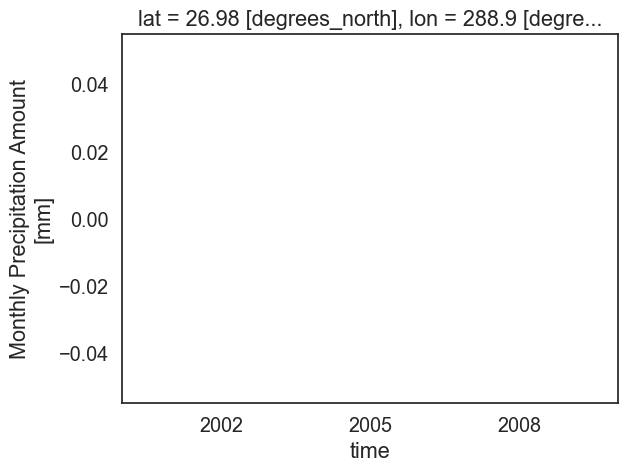

In [38]:
# Quick plot of the data
pr_single_point.plot.line()
plt.show()